#Project outline

In [123]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

#Datafram import
df = pd.read_csv("Data/Clean_Data/OpsCalculations.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 90 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             548 non-null    int64  
 1   fldOrderNumber                 543 non-null    object 
 2   fldQuoteNumber                 548 non-null    object 
 3   fldTotalMinutes                548 non-null    int64  
 4   fldTotalHours                  548 non-null    float64
 5   fldTotalHoursCost              548 non-null    object 
 6   fldRefuseRecycle               548 non-null    float64
 7   fldStandardHours               548 non-null    int64  
 8   fldStandardCost                548 non-null    object 
 9   fldChallengeHours              548 non-null    float64
 10  fldChallengeCost               548 non-null    object 
 11  fldCarryUpHours                548 non-null    int64  
 12  fldCarryUpCost                 548 non-null    flo

In [112]:
df.head()

,ID,fldOrderNumber,fldQuoteNumber,fldTotalMinutes,fldTotalHours,fldTotalHoursCost,fldRefuseRecycle,fldStandardHours,fldStandardCost,fldChallengeHours,...,fldWareHouseRecHrs,fldOnSiteRecHrs,fldNewUsedRecHrs,fldMiscServices,fldAvgCostPerStationAnch,fldAvgCostPerStationBase,fldAvgCostPerStationER,fldAvgCostPerStationValley,fldAvgCostPerStationOutOfTown,fldNumberOfStations
0,535,000111,000111,39117,652.0,"$24,776.00",26.1,678,"$25,764.00",789.0,...,97.80,58.680,97.80,0,"$34,723.64","$46,603.64","$41,851.64","$48,336.14","$33,766.40",1.0
1,585,1,1,2831,47.2,"$1,888.00",1.9,49,"$1,960.00",55.0,...,7.08,4.248,7.08,0,"$2,613.20","$3,523.20","$3,159.20","$3,575.70","$2,565.20",1.0
2,126,54572,111111,14037,234.0,"$8,716.50",9.4,243,"$9,051.75",269.0,...,35.10,21.060,35.10,0,"$11,805.41","$15,821.66","$14,215.16","$16,480.41","$11,328.73",1.0
3,105,53347,1111111,10078,168.0,"$6,258.00",6.7,175,"$6,518.75",210.0,...,25.20,15.120,25.20,0,"$8,963.44","$9,554.07","$9,317.82","$9,650.94","$8,873.20",1.0
4,455,123321,123321,4631,77.2,"$2,875.70",3.1,80,"$2,980.00",93.0,...,11.58,6.948,11.58,0,$493.20,$537.50,$519.78,$699.45,$497.79,8.0


In [125]:
##Filtered the Data down to the needed columns of Data.

df[['fldDate','fldQuoteNumber', 'fldTotalHoursCost', 'fldTotalPeiceCount', 'fldNumDays', 
'fldNumberOfInstallers', 'fldLaborStdTime', 'fldLaborOverTime']]

,fldDate,fldQuoteNumber,fldTotalHoursCost,fldTotalPeiceCount,fldNumDays,fldNumberOfInstallers,fldLaborStdTime,fldLaborOverTime
0,3/4/20,000111,"$24,776.00",2140.0,1,99,880,6.799988
1,1/14/22,1,"$1,888.00",123.0,1,7,64,0.099998
2,8/11/16,111111,"$8,716.50",913.0,1,34,304,0.100006
3,6/17/16,1111111,"$6,258.00",526.0,5,5,224,11.200000
4,4/16/19,123321,"$2,875.70",111.0,4,3,96,8.599998
...,...,...,...,...,...,...,...,...
543,7/29/22,VA Fair OC001,"$8,316.00",759.0,7,5,304,4.399994
544,7/29/22,VA Fair OM001,"$1,165.50",237.0,1,5,40,3.000000
545,2/15/17,VA Stations,"$23,031.67",3422.0,1,94,840,0.700012
546,8/12/22,Wales_81222,"$1,774.50",179.0,4,2,64,6.599998


<AxesSubplot:xlabel='fldNumDays', ylabel='count'>

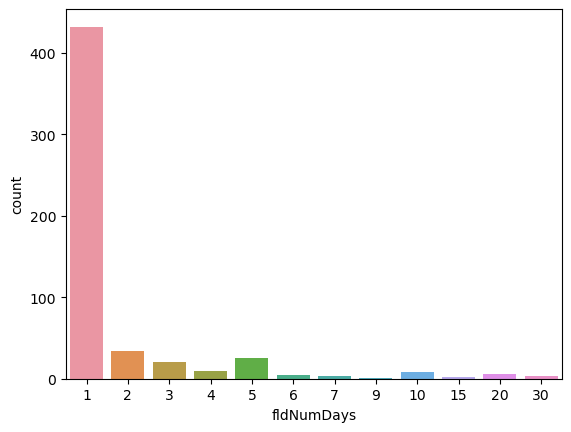

In [126]:
df_foc = df[['fldDate','fldQuoteNumber', 'fldTotalHoursCost', 'fldTotalPeiceCount', 'fldNumDays', 
'fldNumberOfInstallers', 'fldLaborStdTime', 'fldLaborOverTime']]

sns.countplot(x='fldNumDays', data=df_foc)

In [122]:
df_foc.groupby(['fldNumberOfInstallers']).sum().head()


,fldTotalPeiceCount,fldNumDays,fldLaborStdTime,fldLaborOverTime
fldNumberOfInstallers,,,,
0,2.0,1,0,2.200000
1,3072.0,188,512,695.229999
2,7952.0,162,2192,609.299990
3,12300.0,163,4002,370.500014
4,12553.0,134,4592,286.500024


<BarContainer object of 548 artists>

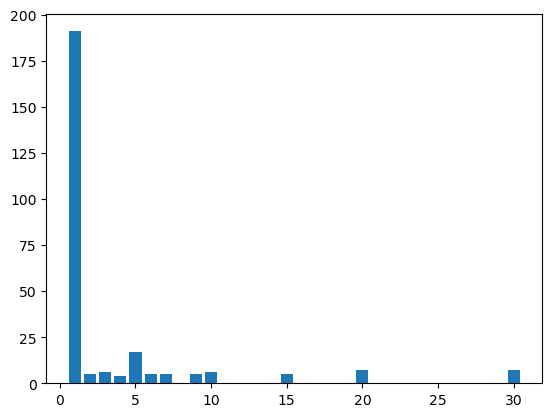

In [127]:
plt.bar(df_foc.fldNumDays, df_foc.fldNumberOfInstallers)

In [146]:
df_foc['fldDate'] = pd.to_datetime(df_foc['fldDate'])
df_foc.groupby(df_foc['fldDate'].dt.to_period('Q'))['fldLaborStdTime'].aggregate('sum')

/var/folders/xf/bf0d690n7bvfl8_6cq4rlkyc0000gn/T/ipykernel_85788/1319484809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_foc['fldDate'] = pd.to_datetime(df_foc['fldDate'])


fldDate
2016Q1     1938
2016Q2     2488
2016Q3     3184
2016Q4      576
2017Q1    15880
2017Q2     1632
2017Q3     1792
2017Q4     4376
2018Q1     1504
2018Q2     1344
2018Q3      720
2018Q4      184
2019Q1      816
2019Q2      944
2019Q3     1912
2019Q4     1024
2020Q1     2184
2021Q2     1616
2021Q3     4304
2021Q4       96
2022Q1      304
2022Q2      856
2022Q3     5720
Freq: Q-DEC, Name: fldLaborStdTime, dtype: int64